In [ ]:
#default_exp data

In [ ]:
#export
import librosa, torchaudio
from fastai2.vision.all import *
from animal_sounds import *

In [ ]:
#export
def sounds_source():
  return untar_data('https://storage.googleapis.com/ml-animal-sounds-datasets/macaques_24414Hz.zip')

In [ ]:
#export
def get_spec(fn, target_rate=24414, num_samples=18310):
  x, rate = torchaudio.load_wav(fn)
  if rate != target_rate: 
    x = torchaudio.transforms.Resample(orig_freq=rate, new_freq=24414, resampling_method='sinc_interpolation')(x)
  x = (x[0] / 32767).numpy()
  x = librosa.util.fix_length(x, num_samples)
  spec = librosa.feature.melspectrogram(x, sr=rate, n_fft=1024, hop_length=140)
  spec = librosa.power_to_db(spec, ref=np.max)
  spec = scale_minmax(spec, 0, 255).astype(np.uint8)
  spec = np.flip(spec, axis=0) # put low frequencies at the bottom in image
  spec = spec
  return spec

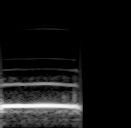

In [ ]:
source = sounds_source()
fns = get_files(source)
PILImageBW.create(get_spec(fns[1458]))

In [ ]:
#export
def get_duration(fn):
  x, rate = torchaudio.load_wav(fn)
  return len(x[0])/rate

In [ ]:
get_duration(fns[0])

0.35000409601048577

## Export -

In [ ]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.ipynb.
Converted Untitled.ipynb.
Converted index.ipynb.
Converted train_duration.ipynb.
